# **Car Price Prediction Assignment**

In [148]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [149]:
# mount google drive in to your Colab enviornment
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
cd /content/drive/MyDrive/DL Assignments


/content/drive/MyDrive/DL Assignments


In [151]:
data = pd.read_csv('/content/drive/MyDrive/DL Assignments/CarPrice_Assignment.csv')

In [152]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [153]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [154]:
#check if there are empty cells, if there are then row and column indexes will be returned where values are empty or missing
np.where(data.applymap(lambda x: x ==''))

(array([], dtype=int64), array([], dtype=int64))

In [155]:
data.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [156]:
# correct the name error in audi 100 ls
data.iloc[3,2] = 'audi 100ls'

In [157]:
# checking data types
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [158]:
# droped car ID column as it has only 0 values in whole column, so dropping this column won't effect the results 
data.drop(columns=['car_ID'], inplace = True)

In [159]:
# get column names so that we can use them for one-hot encoding of catagorical featrues in next cell
data.columns[data.dtypes=='object']

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [160]:
# one-hot encode all catagorical columns
final_data = pd.get_dummies(data, columns=['CarName', 'fueltype',	'aspiration',	'doornumber',	'carbody',	'drivewheel',	'enginelocation',	'enginetype',	'cylindernumber',	'fuelsystem'], drop_first = True)


In [161]:
final_data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [162]:
#check statistical data to see abnormal values and outliers
final_data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.004878,0.004878,0.004878,0.014634,0.004878,0.004878,0.004878,0.004878,0.009756,0.004878,0.009756,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,...,0.004878,0.004878,0.009756,0.009756,0.009756,0.004878,0.004878,0.009756,0.004878,0.004878,0.004878,0.902439,0.180488,0.439024,0.039024,0.341463,0.468293,0.121951,0.585366,0.370732,0.014634,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,0.069843,0.069843,0.069843,0.120377,0.069843,0.069843,0.069843,0.069843,0.098531,0.069843,0.098531,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,...,0.069843,0.069843,0.098531,0.098531,0.098531,0.069843,0.069843,0.098531,0.069843,0.069843,0.069843,0.297446,0.385535,0.497483,0.194127,0.475361,0.500215,0.328031,0.493865,0.484183,0.120377,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.00

In [163]:
# I havde initialized a seed value so that each time I can get the same random number sequence, this will help me improve performance of my model.
# 0.72 means I have taken 72% values for training set
# as I will make 72/4 = 18 rows of k fold validation data
np.random.seed(12345)
msk = np.random.rand(len(final_data)) < 0.72
train_total = final_data[msk]
test_total = final_data[~msk]


In [164]:
#check the length of our test and train datasets
print(len(train_total))
print(len(test_total))


139
66


In [165]:
train_total.head(10)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
12,0,101.2,176.8,64.8,54.3,2710,164,3.31,3.19,9.0,121,4250,21,28,20970.000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
13,0,101.2,176.8,64.8,54.3,2765,164,3.31,3.19,9.0,121,4250,21,28,21105.000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
14,1,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121,4250,20,25,24565.000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [166]:
# check statistical overview if there are some outliers and abnormal values
train_total.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.0,139.000000,139.000000,139.0,139.000000,139.000000,139.000000,139.0,139.000000,139.000000,139.000000,139.0,139.000000,139.000000,139.0,139.000000,139.000000,139.000000,139.000000,139.0,139.000000,139.0,139.0,139.000000,...,139.000000,139.0,139.000000,139.0,139.000000,139.000000,139.0,139.000000,139.000000,139.000000,139.0,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.0,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,0.805755,98.856835,174.694245,66.011511,53.708633,2597.251799,131.143885,3.354245,3.247662,9.956978,108.179856,5112.230216,24.575540,30.043165,13698.220626,0.007194,0.0,0.007194,0.014388,0.0,0.007194,0.007194,0.007194,0.0,0.007194,0.007194,0.007194,0.0,0.007194,0.007194,0.0,0.007194,0.007194,0.007194,0.007194,0.0,0.007194,0.0,0.0,0.007194,...,0.007194,0.0,0.014388,0.0,0.014388,0.007194,0.0,0.014388,0.007194,0.007194,0.0,0.913669,0.187050,0.417266,0.035971,0.330935,0.460432,0.143885,0.561151,0.388489,0.021583,0.007194,0.057554,0.669065,0.093525,0.093525,0.021583,0.043165,0.748201,0.143885,0.0,0.007194,0.021583,0.316547,0.021583,0.086331,0.007194,0.474820,0.043165,0.007194
std,1.238733,6.140682,12.249536,2.072843,2.502419,528.159315,45.726275,0.267869,0.319534,3.781129,42.692234,470.038610,6.537493,6.879786,8253.069388,0.084819,0.0,0.084819,0.119517,0.0,0.084819,0.084819,0.084819,0.0,0.084819,0.084819,0.084819,0.0,0.084819,0.084819,0.0,0.084819,0.084819,0.084819,0.084819,0.0,0.084819,0.0,0.0,0.084819,...,0.084819,0.0,0.119517,0.0,0.119517,0.084819,0.0,0.119517,0.084819,0.084819,0.0,0.281868,0.391362,0.494891,0.186892,0.472252,0.500235,0.352242,0.498041,0.489170,0.145842,0.084819,0.233740,0.472252,0.292220,0.292220,0.145842,0.203964,0.435616,0.352242,0.0,0.084819,0.145842,0.466811,0.145842,0.281868,0.084819,0.501172,0.203964,0.084819
min,-2.000000,86.600000,144.600000,61.800000,47.800000,1713.000000,70.000000,2.680000,2.190000,7.000000,52.000000,4150.000000,13.000000,16.000000,5195.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.

In [167]:
print(train_total.dtypes)

symboling            int64
wheelbase          float64
carlength          float64
carwidth           float64
carheight          float64
                    ...   
fuelsystem_idi       uint8
fuelsystem_mfi       uint8
fuelsystem_mpfi      uint8
fuelsystem_spdi      uint8
fuelsystem_spfi      uint8
Length: 189, dtype: object


In [168]:
# get our price labels and store in another dataframe
train_label = train_total.loc[:,'price']
test_label = test_total.loc[:,'price']

In [169]:
train_label

1      16500.0
2      16500.0
3      13950.0
4      17450.0
5      15250.0
        ...   
198    18420.0
199    18950.0
201    19045.0
202    21485.0
204    22625.0
Name: price, Length: 139, dtype: float64

In [170]:
# separating labels from training and test data
test_data= test_total.drop(columns = ['price'])
train_data= train_total.drop(columns = ['price'])

In [171]:
train_data.shape

(139, 188)

In [172]:
train_data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,CarName_dodge challenger se,...,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-2,104.3,188.8,67.2,56.2,3045,130,3.62,3.15,7.5,162,5100,17,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
199,-1,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,5100,17,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [173]:
#get indices of the columns so that I know how many columns I have to normalize, as catagorical columns which I
# have added with onehot encoding, do not need to be normalized
{train_data.columns.get_loc(m): m for idx, m in enumerate(train_data.columns)}

{0: 'symboling',
 1: 'wheelbase',
 2: 'carlength',
 3: 'carwidth',
 4: 'carheight',
 5: 'curbweight',
 6: 'enginesize',
 7: 'boreratio',
 8: 'stroke',
 9: 'compressionratio',
 10: 'horsepower',
 11: 'peakrpm',
 12: 'citympg',
 13: 'highwaympg',
 14: 'CarName_alfa-romero Quadrifoglio',
 15: 'CarName_alfa-romero giulia',
 16: 'CarName_alfa-romero stelvio',
 17: 'CarName_audi 100ls',
 18: 'CarName_audi 4000',
 19: 'CarName_audi 5000',
 20: 'CarName_audi 5000s (diesel)',
 21: 'CarName_audi fox',
 22: 'CarName_bmw 320i',
 23: 'CarName_bmw x1',
 24: 'CarName_bmw x3',
 25: 'CarName_bmw x4',
 26: 'CarName_bmw x5',
 27: 'CarName_bmw z4',
 28: 'CarName_buick century',
 29: 'CarName_buick century luxus (sw)',
 30: 'CarName_buick century special',
 31: 'CarName_buick electra 225 custom',
 32: 'CarName_buick opel isuzu deluxe',
 33: 'CarName_buick regal sport coupe (turbo)',
 34: 'CarName_buick skyhawk',
 35: 'CarName_buick skylark',
 36: 'CarName_chevrolet impala',
 37: 'CarName_chevrolet monte ca

In [174]:
# I normalized data because data has big vlaues in decimal and it will worsen performance of my model, may overfit 
# or may face hardware resource high usage
# here I will apply the formula:
#                               normalized_train_data = (train_data - mean)/ stadrad_deviation

# firt take mean of training, then subtract mean from each value of the array slice train_data.iloc[:,0:14]
mean = train_data.iloc[:,0:14].mean(axis=0)
train_data.iloc[:,0:14] -= mean
std = train_data.iloc[:,0:14].std(axis=0)
train_data.iloc[:,0:14] /= std
test_data.iloc[:,0:14] -= mean
test_data.iloc[:,0:14] /= std

In [175]:
mean

symboling              0.805755
wheelbase             98.856835
carlength            174.694245
carwidth              66.011511
carheight             53.708633
curbweight          2597.251799
enginesize           131.143885
boreratio              3.354245
stroke                 3.247662
compressionratio       9.956978
horsepower           108.179856
peakrpm             5112.230216
citympg               24.575540
highwaympg            30.043165
dtype: float64

In [176]:
std

symboling             1.238733
wheelbase             6.140682
carlength            12.249536
carwidth              2.072843
carheight             2.502419
curbweight          528.159315
enginesize           45.726275
boreratio             0.267869
stroke                0.319534
compressionratio      3.781129
horsepower           42.692234
peakrpm             470.038610
citympg               6.537493
highwaympg            6.879786
dtype: float64

In [177]:
mean_label = train_label.mean()
train_label -= mean_label
std_label = train_label.std()
train_label /= std_label
test_label -= mean_label
test_label /= std_label


In [178]:
mean_label

13698.22062589928

In [179]:
std_label

8253.069388084403

In [180]:
print(mean_label)

13698.22062589928


In [181]:
test_label

0     -0.024624
6      0.486095
8      1.233090
10     0.331002
11     0.390979
         ...   
190   -0.450526
191   -0.048857
194   -0.091871
200    0.381286
203    1.062851
Name: price, Length: 66, dtype: float64

In [182]:
train_data.shape

(139, 188)

In [183]:
# store values in numpy array
test = np.array(test_data.iloc[:]).astype('float32')

In [184]:
train = np.array(train_data.iloc[:]).astype('float32')

In [185]:
test_l= np.array(test_label.astype('float32'))

In [186]:
train_l= np.array(train_label.astype('float32'))

In [187]:
train.shape[1]


188

In [188]:
(141,192)[1]

192

In [189]:
train.dtype

dtype('float32')

In below sections I have created four different models using different activation functions

One using relu as activation Function, 
one using tanh, 
one using regularizer along with tanh, 
and one using dropout along with relu

In [190]:
# model using relu as activation function
from keras import models
from keras import layers
model_relu = models.Sequential()
model_relu.add(layers.Dense(128, activation= 'relu',input_shape=(train.shape[1],)))
model_relu.add(layers.Dense(64, activation= 'relu'))
model_relu.add(layers.Dense(32, activation= 'relu'))
model_relu.add(layers.Dense(1))
model_relu.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [191]:
model_relu.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               24192     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 33        
Total params: 34,561
Trainable params: 34,561
Non-trainable params: 0
_________________________________________________________________


In [192]:
# Model using tanh as activation function
model_tanh = models.Sequential()
model_tanh.add(layers.Dense(128, activation= 'tanh',input_shape=(train.shape[1],)))
model_tanh.add(layers.Dense(64, activation= 'tanh'))
model_tanh.add(layers.Dense(32, activation= 'tanh'))
model_tanh.add(layers.Dense(1))
model_tanh.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [193]:
model_tanh.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 128)               24192     
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 33        
Total params: 34,561
Trainable params: 34,561
Non-trainable params: 0
_________________________________________________________________


In [194]:
# Model using tanh as activation function and Regularizer
from keras import regularizers
model_regular_tanh = models.Sequential()
model_regular_tanh.add(layers.Dense(10, activation= 'tanh',kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001),input_shape=(train.shape[1],)))
model_regular_tanh.add(layers.Dense(8, activation= 'tanh',kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
model_regular_tanh.add(layers.Dense(6, activation= 'tanh',kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
model_regular_tanh.add(layers.Dense(1))
model_regular_tanh.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [195]:
model_regular_tanh.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 10)                1890      
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_38 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 7         
Total params: 2,039
Trainable params: 2,039
Non-trainable params: 0
_________________________________________________________________


In [196]:
# Model using relu as activation function and dropout
from keras import regularizers
model_drop_relu = models.Sequential()
model_drop_relu.add(layers.Dense(10, activation= 'relu',input_shape=(train.shape[1],)))
model_drop_relu.add(layers.Dropout(0.2))
model_drop_relu.add(layers.Dense(8, activation= 'relu'))
model_drop_relu.add(layers.Dropout(0.2))
model_drop_relu.add(layers.Dense(6, activation= 'relu'))
model_drop_relu.add(layers.Dropout(0.2))
model_drop_relu.add(layers.Dense(1))
model_drop_relu.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [197]:
model_drop_relu.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 10)                1890      
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_42 (Dense)             (None, 6)                 54        
_________________________________________________________________
dropout_5 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)               

In [198]:
#k fold validation with relu
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_relu = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = model_relu
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_relu.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [199]:
#k fold validation with tanh
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_tanh = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = model_tanh
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_tanh.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [200]:
#k-fold validtion with regularization and tanh
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_regular = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = model_regular_tanh
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_regular.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [201]:
#k-fold validtion with dropout and relu
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_drop = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = model_drop_relu
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=1)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
  all_scores_drop.append(val_mae)

processing fold # 0
Epoch 1/100
105/105 [==============================] - 1s 1ms/step - loss: 1.2081 - mae: 0.7586
Epoch 2/100
105/105 [==============================] - 0s 1ms/step - loss: 1.0401 - mae: 0.6487
Epoch 3/100
105/105 [==============================] - 0s 1ms/step - loss: 0.7557 - mae: 0.5467
Epoch 4/100
105/105 [==============================] - 0s 1ms/step - loss: 0.4793 - mae: 0.4405
Epoch 5/100
105/105 [==============================] - 0s 1ms/step - loss: 0.9021 - mae: 0.5874
Epoch 6/100
105/105 [==============================] - 0s 1ms/step - loss: 0.3207 - mae: 0.3695
Epoch 7/100
105/105 [==============================] - 0s 1ms/step - loss: 0.6885 - mae: 0.4836
Epoch 8/100
105/105 [==============================] - 0s 1ms/step - loss: 0.7024 - mae: 0.5579
Epoch 9/100
105/105 [==============================] - 0s 1ms/step - loss: 0.8379 - mae: 0.5900
Epoch 10/100
105/105 [==============================] - 0s 1ms/step - loss: 0.3991 - mae: 0.4532
Epoch 11/100
105/10

In [202]:
# here we will see MAE mean absolute Error scores of all model that I have saved in the list during each training in above section
all_scores_relu

[0.340802401304245,
 0.1329060047864914,
 0.08954727649688721,
 0.049680016934871674]

In [203]:
all_scores_tanh

[0.3231324255466461,
 0.1696549355983734,
 0.06834888458251953,
 0.04217369481921196]

In [204]:
all_scores_regular

[0.331185519695282,
 0.2745516002178192,
 0.3306233882904053,
 0.16888505220413208]

In [205]:
all_scores_drop

[0.4315987229347229,
 0.4142024517059326,
 0.37924978137016296,
 0.2934581935405731]

In [206]:
model_tanh1 = model_tanh
model_tanh1.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_tanh1.evaluate(test, test_l)

3/3 [==============================] - 0s 4ms/step - loss: 0.0975 - mae: 0.2241


In [207]:
model_relu1 = model_relu
model_relu1.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_relu1.evaluate(test, test_l)

3/3 [==============================] - 0s 4ms/step - loss: 0.0973 - mae: 0.2195


In [208]:
model_regular_tanh1 = model_regular_tanh
model_regular_tanh1.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_regular_tanh1.evaluate(test, test_l)

3/3 [==============================] - 0s 4ms/step - loss: 0.1624 - mae: 0.2361


In [209]:
model_drop_relu1 = model_drop_relu
model_drop_relu1.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_drop_relu1.evaluate(test, test_l)

3/3 [==============================] - 0s 5ms/step - loss: 0.2340 - mae: 0.3741


In [210]:
test_l

array([-0.02462364,  0.48609543,  1.2330903 ,  0.3310016 ,  0.39097932,
        3.3462434 ,  2.8088677 , -1.0356414 , -0.89702636, -0.848923  ,
       -0.7378129 , -0.5788417 , -0.8291728 , -1.005592  , -0.5577586 ,
       -0.58805037, -0.41235816, -0.40629983, -0.8364428 , -0.8485595 ,
        0.2358855 , -0.58805037,  0.5629153 ,  1.7629538 ,  2.1691055 ,
       -0.90987   , -0.7281195 , -0.4530703 ,  0.14185987, -0.79960805,
       -0.8541332 , -0.8298998 , -0.76931626, -0.7147911 , -0.6905577 ,
       -0.6602659 , -0.21788508,  0.38795012,  0.35523504, -0.90502334,
        1.0080831 ,  0.16257943,  0.59635746, -1.03964   , -0.29555315,
       -1.0117716 , -0.5961686 , -0.81911594, -0.7876125 , -0.5040816 ,
       -0.6360325 , -0.4494353 , -0.30282316,  0.4811276 , -0.57557017,
       -0.36352786, -0.33929443, -0.296886  ,  0.346511  , -0.7176991 ,
       -0.66680896, -0.4505258 , -0.04885705, -0.09187135,  0.38128594,
        1.0628506 ], dtype=float32)

In [211]:
def predict(model, m):
  print(f" The Actual value Price was : {test_l[m]* std_label + mean_label} " )
  return(f" The Predicted Price was : {(model.predict(test[m:m+1].reshape(1,test.shape[1]))) * std_label + mean_label} ")


In [212]:
x_tanh = predict(model_tanh1,2)
x_tanh

 The Actual value Price was : 23875.000280779983 


' The Predicted Price was : [[20977.924]] '

In [213]:
x_relu = predict(model_relu1,2)
x_relu

 The Actual value Price was : 23875.000280779983 


' The Predicted Price was : [[19801.434]] '

In [214]:
x_regular = predict(model_regular_tanh1,2)
x_regular

 The Actual value Price was : 23875.000280779983 


' The Predicted Price was : [[20158.348]] '

In [215]:
x_drop = predict(model_drop_relu1,2)
x_drop

 The Actual value Price was : 23875.000280779983 


' The Predicted Price was : [[21515.375]] '

In [216]:
def plot_fn(mod):
  y_true = test_l* std_label + mean_label
  y_pred = mod.predict(test) * std_label + mean_label
  return y_true , y_pred.flatten()

In [217]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plotting(mod, label):
  y_true, y_pred = plot_fn(mod)
  coef = np.polyfit(y_true,y_pred,1)
  poly1d_fn = np.poly1d(coef) 
  # poly1d_fn is now a function which takes in x and returns an estimate for y
  plt.figure()
  plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
  plt.title(label)
  plt.xlabel('Thousand Dollar True' )
  plt.ylabel('Thousand Dollar Predictions' )
  plt.xlim(0, 50000)
  plt.ylim(0, 50000)

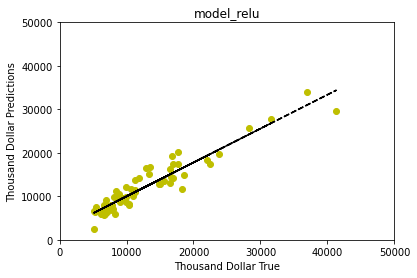

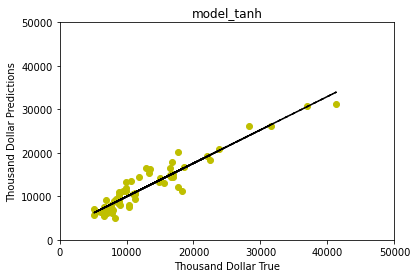

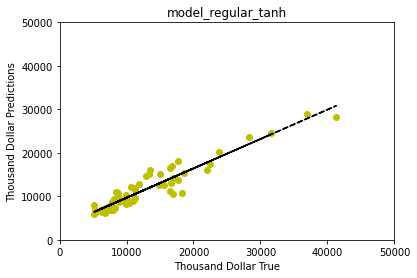

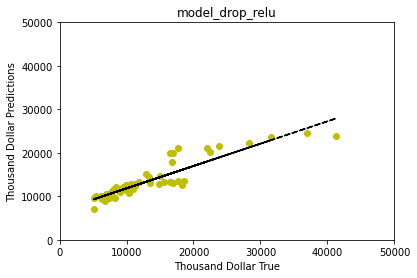

In [218]:
plot_list = []
for i,j in enumerate([model_relu1, model_tanh1, model_regular_tanh1, model_drop_relu1]):
  list_name = ['model_relu', 'model_tanh', 'model_regular_tanh', 'model_drop_relu']
  plot_list.append(plotting(j,list_name[i]))